<a href="https://colab.research.google.com/github/S0wang/Futer-sale-forecast-Kaggle/blob/main/S0wang_Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 (due Feb 28th at 11:59pm)
If you are not familiar with Python or the libraries used in this class, you can get started by following the [Python Numpy Tutorial](https://cs231n.github.io/python-numpy-tutorial/) from [CS231 @ Stanford](http://cs231n.stanford.edu).

## Question 1
Generate the following matrix using any of the tensor libraries.  No loops allowed.
```
[[ 50  50  50  50  50]
 [-50  40  50  50  50]
 [-50 -50  30  50  50]
 [-50 -50 -50  20  50]
 [-50 -50 -50 -50  10]]
```

In [1]:
import numpy as np

matrix = np.zeros((5, 5), int) 
main = np.array([50,40,30,20,10])
np.fill_diagonal(matrix, main)
upper = np.repeat(np.array(50), [12])
lower = np.repeat(np.array(-50), [12])
np.fill_diagonal(matrix[:-1, 1:], upper)
np.fill_diagonal(matrix[1:, :-1], lower)
np.fill_diagonal(matrix[:-2, 2:], upper)
np.fill_diagonal(matrix[2:, :-2], lower)
np.fill_diagonal(matrix[:-3, 3:], upper)
np.fill_diagonal(matrix[3:, :-3], lower)
np.fill_diagonal(matrix[:-4, 4:], upper)
np.fill_diagonal(matrix[4:, :-4], lower)
matrix # your answer here

array([[ 50,  50,  50,  50,  50],
       [-50,  40,  50,  50,  50],
       [-50, -50,  30,  50,  50],
       [-50, -50, -50,  20,  50],
       [-50, -50, -50, -50,  10]])

## Question 2
Generate the following matrix using any of the tensor libraries.  No loops allowed.
```
[[ 0  1  2  3  4  5  6  7  8  9]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]
 [ 5  6  7  8  9 10 11 12 13 14]
 [ 6  7  8  9 10 11 12 13 14 15]
 [ 7  8  9 10 11 12 13 14 15 16]
 [ 8  9 10 11 12 13 14 15 16 17]
 [ 9 10 11 12 13 14 15 16 17 18]]
```

In [2]:
import numpy as np
a = np.arange(0,10) # your answer here
b = np.arange(0,10)
c = a.reshape(10,1)+b
print(c)

[[ 0  1  2  3  4  5  6  7  8  9]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]
 [ 5  6  7  8  9 10 11 12 13 14]
 [ 6  7  8  9 10 11 12 13 14 15]
 [ 7  8  9 10 11 12 13 14 15 16]
 [ 8  9 10 11 12 13 14 15 16 17]
 [ 9 10 11 12 13 14 15 16 17 18]]


## Question 3
Create a function that takes a single parameter `n` and returns a tensor of shape `(n,n,n)` and the following contents for an example value of `n=3`.  Do not use loops.
```
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[10 10 10]
  [10 10 10]
  [10 10 10]]

 [[20 20 20]
  [20 20 20]
  [20 20 20]]]
```

In [3]:
import numpy as np 
import torch   # your answer here

def tensor_fun(n):
  mat = torch.ones([n,n])
  scalar = np.array([0,10,20])
  output = np.tensordot(scalar,mat, axes=0).astype("int")
  return output

output = tensor_fun(3)

In [ ]:
print(output)

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[10 10 10]
  [10 10 10]
  [10 10 10]]

 [[20 20 20]
  [20 20 20]
  [20 20 20]]]


## Exercise 4
Create a function that generates 2 square matrices of dimension `n x n` filled with random values from a unit gaussian distribution, computes their product, and measures the time it takes.  The function should return the output matrix and the time spent.  Use `time.perf_counter`.

In [4]:
import random
from time import perf_counter  # your answer here
def unit_gaussian_prod(n, dim, seeds):
  time_start = perf_counter()
  random.seed(seeds)
  data = np.random.standard_normal(size=(dim,n,n))
  mat1 = data[0,:,:]
  mat2 = data[1,:,:]
  #print(mat1)
  #print(mat2)
  prod = np.dot(mat1,mat1)
  time_process = perf_counter() - time_start
  return prod, time_process


## Exercise 5
Test your function from Exercise 4 with the following values of `n`:
```
np.linspace(10, 2**12, 2**5, dtype=int)
```
Use the returned values to create a plot of how the time varies with respect to `n`.

In [7]:
import numpy as np

n_list = np.linspace(10, 2**12, 2**5, dtype=int)
print(n_list)
time_mat = []
for n in n_list:
  t = unit_gaussian_prod(n,2,100)[1]
  time_mat.append(t)
  #print(n)
  # your answer here

[  10  141  273  405  537  669  800  932 1064 1196 1328 1459 1591 1723
 1855 1987 2118 2250 2382 2514 2646 2777 2909 3041 3173 3305 3436 3568
 3700 3832 3964 4096]


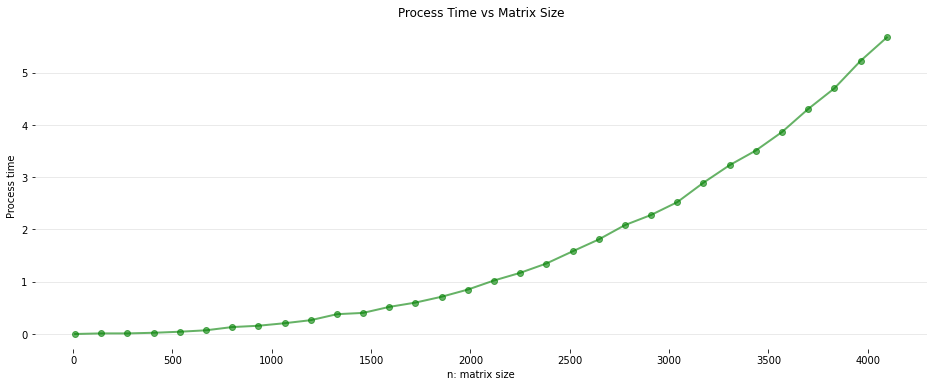

In [8]:
import numpy as np
import matplotlib.pyplot as plt
LINEWIDTH=2
ALPHA=.6

plt.figure(figsize=(16,6))
# Plot the sales of the year 2013
plt.plot(n_list, time_mat, '-o', color='green', linewidth=LINEWIDTH, alpha=ALPHA)

# Axes parameters
ax = plt.gca()
ax.set_title('Process Time vs Matrix Size')
ax.set_ylabel('Process time')
ax.set_xlabel('n: matrix size')
ax.grid(axis='y', color='gray', alpha=.2)
    
# Remove the frame off the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
#plt.legend(loc=2, title='Legend')
plt.show()

## Exercise 6 (Keras and TF)
Earlier you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.  Also report the accuracy on the test data.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [9]:
import numpy as np
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

#(trainX, trainY), (testX, testY) = mnist.load_data()

print(x_train.shape)
#print(trainX.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [ ]:
# TODO
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# TODO
x_train  = x_train / 255.0
x_test   = x_test / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)# TODO
])

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
class TerminateOnBaseline(Callback): #I found this two functions on Google as "EarlyStopping" did not work out.
    """Callback that terminates training when either acc or val_acc reaches a specified baseline
    """
    def __init__(self, monitor='accuracy', baseline=0.9):
        super(TerminateOnBaseline, self).__init__()
        self.monitor = monitor
        self.baseline = baseline

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        acc = logs.get(self.monitor)
        if acc is not None:
            if acc >= self.baseline:
                print('Epoch %d: Reached baseline, terminating training' % (epoch))
                self.model.stop_training = True

callbacks = [TerminateOnBaseline(monitor='accuracy', baseline=0.99)]
#callbacks = EarlyStopping(monitor='accuracy', baseline=0.99, patience=200)
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[callbacks], verbose=1) # TODO

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3053 - accuracy: 0.9122 - val_loss: 0.1719 - val_accuracy: 0.9497
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1457 - accuracy: 0.9584 - val_loss: 0.1164 - val_accuracy: 0.9644
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1057 - accuracy: 0.9695 - val_loss: 0.0964 - val_accuracy: 0.9702
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0826 - accuracy: 0.9765 - val_loss: 0.0923 - val_accuracy: 0.9731
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0679 - accuracy: 0.9805 - val_loss: 0.0809 - val_accuracy: 0.9758
Epoch 6/10
 410/1875 [=====>........................] - ETA: 4s - loss: 0.0565 - accuracy: 0.9838

In [1]:
# TODO
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#(trainX, trainY), (testX, testY) = mnist.load_data()

# TODO
x_train  = x_train / 255.0
x_test   = x_test / 255.0
##x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
#y_train = y_train.reshape((y_train.shape[0], 28, 28, 1))

 

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3), activation=tf.nn.relu,kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D((2, 2)),
                                    #tf.keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu,kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
                                    #tf.keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu,kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
                                    #tf.keras.layers.MaxPooling2D((2, 2)),
                                    tf.keras.layers.Flatten(), 
                                    #tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)# TODO
])

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
class TerminateOnBaseline(Callback): #I found this two functions on Google as "EarlyStopping" did not work out.
    """Callback that terminates training when either acc or val_acc reaches a specified baseline
    """
    def __init__(self, monitor='accuracy', baseline=0.9):
        super(TerminateOnBaseline, self).__init__()
        self.monitor = monitor
        self.baseline = baseline

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        acc = logs.get(self.monitor)
        if acc is not None:
            if acc >= self.baseline:
                print('Epoch %d: Reached baseline, terminating training' % (epoch))
                self.model.stop_training = True

callbacks = [TerminateOnBaseline(monitor='accuracy', baseline=0.99)]
#callbacks = EarlyStopping(monitor='accuracy', baseline=0.99, patience=200) 
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), callbacks=[callbacks], verbose=1) # TODO

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1570 - accuracy: 0.9526 - val_loss: 0.0732 - val_accuracy: 0.9769
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0544 - accuracy: 0.9829 - val_loss: 0.0506 - val_accuracy: 0.9842
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0352 - accuracy: 0.9893 - val_loss: 0.0415 - val_accuracy: 0.9869
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0235 - accuracy: 0.9929 - val_loss: 0.0508 - val_accuracy: 0.9843
